1. What is Boosting in Machine Learning? Explain how it improves weak
learners?
  - Boosting is an ensemble learning technique that combines multiple weak learners (usually simple models like decision stumps – one-level decision trees) to form a strong learner with much higher accuracy. Instead of training one big complex model, boosting builds models sequentially, where each new model tries to fix the errors made by the previous ones.

2. What is the difference between AdaBoost and Gradient Boosting in terms
of how models are trained?
     - AdaBoost (Adaptive Boosting):
          - Models are trained sequentially.
          - After each round, it updates the weights of training samples: Higher weights for misclassified samples. Lower weights for correctly classified samples.
          - The next weak learner focuses more on the “hard” samples
          - Final model is a weighted sum of all weak learners.
   -  Gradient Boosting:
        - Models are also trained sequentially, but instead of reweighting samples, it fits each new learner to the residual errors (gradients) of the previous model.
        - Uses gradient descent on a loss function to minimize errors.
        - Each new weak learner tries to correct the mistakes (residuals) of the ensemble so far.
        - Final model is the sum of all learners’ predictions.      

3. How does regularization help in XGBoost?
   - Regularization in XGBoost adds penalty terms (L1 and L2) to the objective function to control model complexity.
  - L1 (Lasso): Makes weights sparse, helps in feature selection.
  - L2 (Ridge): Prevents large weights, reduces overfitting.
  - Tree parameters (e.g., gamma, max_depth): Further control complexity.
  - This helps XGBoost prevent overfitting, improve generalization, and build more robust models.

4. Why is CatBoost considered efficient for handling categorical data?
    - CatBoost is considered efficient because it can natively handle categorical features without needing one-hot encoding or extensive preprocessing.
   - Uses ordered target statistics (permutation-based encoding) to convert categories into numbers while avoiding target leakage.- Automatically deals with high-cardinality categorical features.
   - Reduces preprocessing time and memory usage compared to one-hot encoding.
   - Improves accuracy by capturing category relationships effectively

5. What are some real-world applications where boosting techniques are
preferred over bagging methods?
- Boosting is often chosen when high accuracy and handling complex patterns are important. Some applications are:

a. Fraud Detection: Boosting (e.g., XGBoost, LightGBM) detects rare fraudulent transactions by focusing on hard-to-classify cases.

b. Customer Churn Prediction: Captures subtle patterns in customer behavior better than bagging methods.

c. Medical Diagnosis: Improves prediction accuracy for diseases by focusing on misclassified cases.

d.Search Ranking (e.g., web search engines): Boosting models rank pages/documents effectively.

e. Finance & Credit Scoring: Identifies risky loan applicants with higher precision.

f. Competitions (Kaggle, etc.): Boosting models (XGBoost, CatBoost, LightGBM) are widely used because they usually outperform bagging methods like Random Forest.

6. Write a Python program to:
● Train an AdaBoost Classifier on the Breast Cancer dataset
● Print the model accuracy


In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("AdaBoost Classifier Accuracy on Breast Cancer dataset:", accuracy)


AdaBoost Classifier Accuracy on Breast Cancer dataset: 0.9736842105263158


7. Write a Python program to:
● Train a Gradient Boosting Regressor on the California Housing dataset
● Evaluate performance using R-squared score


In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance using R² score
r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Regressor R² score on California Housing dataset:", r2)


Gradient Boosting Regressor R² score on California Housing dataset: 0.8004451261281281


8. Write a Python program to:
● Train an XGBoost Classifier on the Breast Cancer dataset
● Tune the learning rate using GridSearchCV
● Print the best parameters and accuracy

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define parameter grid for learning rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate on test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("XGBoost Classifier Accuracy on Breast Cancer dataset:", accuracy)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:01:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'learning_rate': 0.2}
XGBoost Classifier Accuracy on Breast Cancer dataset: 0.956140350877193


9. Write a Python program to:
● Train a CatBoost Classifier
● Plot the confusion matrix using seaborn

In [6]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.0 MB/s eta 0:00:00


CatBoost Classifier Accuracy: 0.9649122807017544


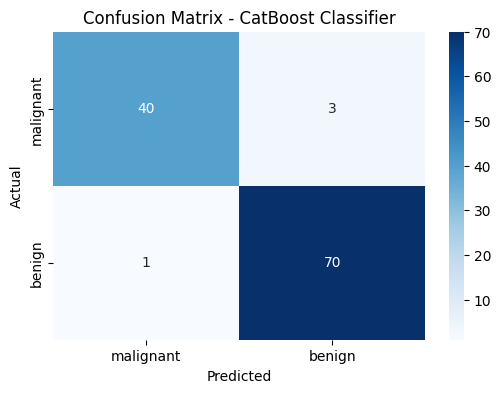

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize CatBoost Classifier (silent training with verbose=0)
model = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=6, verbose=0, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("CatBoost Classifier Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()


10. You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model


1) Data preprocessing & handling missing / categorical values

Inspect & clean: drop exact duplicates, handle outliers (winsorize or clip), parse dates if any.

- Missing values:

Numeric → median or mean imputation (robust: median). For time-series/sequence use forward/backward fill or model-based imputation.

Categorical → fill with a constant token ("missing") or use model-based imputation.

For advanced use: IterativeImputer or KNN imputer.

- Categorical encoding:

CatBoost: no encoding required — it uses ordered target statistics (safe K-fold target encoding internally) and handles high-cardinality categories.

XGBoost/LightGBM: use target encoding (with proper K-fold/leave-one-out to avoid leakage) or one-hot for low-cardinality columns. For very high-cardinality prefer frequency encoding or target smoothing.

- Feature scaling:

Tree-based boosters don’t require scaling, but if you use linear base learners or any distance-based method, scale numeric features.

- Feature engineering:

Create ratio features (e.g., outstanding/limit), time-since-last-default, aggregated transaction features (counts, sums, std), and interaction features.

Train-test split: stratify by target (important for imbalanced classes).

2) Handling imbalance

- Algorithm-level: set class weights / scale_pos_weight (XGBoost) so the learner emphasizes the minority class.

- Data-level: oversample (SMOTE) or undersample; use with care (risk of overfitting).

- Cost-sensitive: optimize threshold to minimize expected business cost (use cost matrix).

- Evaluation: always use stratified CV during tuning.

3) Choice between AdaBoost, XGBoost, CatBoost

- AdaBoost:

Simpler; base learners typically shallow trees.

Not ideal for noisy / very imbalanced data. Use for simple tasks or baseline.

- XGBoost:

Fast, very flexible, widely used; needs encoding for categorical features.

Good for big tabular datasets; supports scale_pos_weight for imbalance.

- CatBoost:

Best choice if many categorical features or you want minimal preprocessing.

Handles categorical features natively and uses ordered target statistics to avoid leakage.
Recommendation: For loan-default with many categorical fields and missing data → CatBoost (or XGBoost if you prefer speed & manual encoding).

4) Hyperparameter tuning strategy

- Use StratifiedKFold (k=4 or 5).

- Optimize for PR-AUC (average_precision) if classes are imbalanced (more informative than accuracy).

- Parameters to tune:

learning_rate (0.01 → 0.2), n_estimators (50 → 1000), max_depth (3 → 8), subsample (0.6 → 1.0), colsample_bytree (0.6 → 1.0).

XGBoost/CatBoost: tune scale_pos_weight or use class weights.

- Use RandomizedSearchCV or Bayesian search (e.g., Optuna) for efficiency. Use early stopping to avoid unnecessary boosting rounds.

- Metric in CV: average_precision (PR-AUC); also track roc_auc.

5) Evaluation metrics (and why)

- PR-AUC (Average Precision) — best for imbalanced datasets; focuses on minority-class precision vs recall.

- ROC-AUC — general separability measure (useful but optimistic when imbalance is extreme).

- Precision / Recall / F1 — choose depending on business cost:

If missing a defaulter is very costly → prioritize recall (minimize FN).

If flagging good customers is costly → prioritize precision (minimize FP).

- Confusion matrix — to compute business costs from FN / FP counts.

- Calibration / Brier score — for good probability estimates (useful when using probabilities to decide interventions).

- Lift and Gain charts — for prioritizing outreach to the top X% of high-risk users.

6) Business benefits from a good boosting model

- Reduce defaults by early detection → lower charge-offs and better provisioning.

- Prioritize interventions (collections, monitoring, collateral checks) on high-risk customers to reduce losses cost-effectively.

- Optimize credit policy and pricing (risk-based pricing / interest spreads).

- Operational ROI: fewer manual reviews, targeted collections, better capital allocation.

- Explainability & compliance: feature

Algorithm used: XGBoost

Classification report (test):
              precision    recall  f1-score   support

           0     0.9608    0.9116    0.9356       215
           1     0.4722    0.6800    0.5574        25

    accuracy                         0.8875       240
   macro avg     0.7165    0.7958    0.7465       240
weighted avg     0.9099    0.8875    0.8962       240

ROC-AUC: 0.8996
PR-AUC (avg precision): 0.7307
Confusion matrix (tn, fp, fn, tp): (np.int64(196), np.int64(19), np.int64(8), np.int64(17))


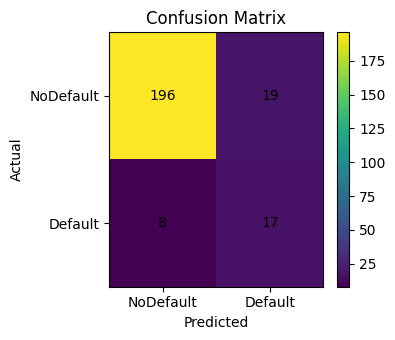


Business cost example: baseline=250,000, model_cost=83,800, savings=166,200


In [11]:

import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

RNG = 42
np.random.seed(RNG)

# -- small synthetic dataset --
X_num, y = make_classification(n_samples=1200, n_features=6, n_informative=4, weights=[0.9], flip_y=0.01, random_state=RNG)
df = pd.DataFrame(X_num, columns=[f'num_{i}' for i in range(X_num.shape[1])])
n = df.shape[0]
df['cat_1'] = np.random.choice(['A','B','C'], size=n, p=[0.7,0.2,0.1])
df['cat_2'] = np.random.choice(['X','Y'], size=n, p=[0.8,0.2])

# small missingness
for col in df.columns:
    if col.startswith('num_'):
        df.loc[np.random.rand(n) < 0.03, col] = np.nan
    else:
        df.loc[np.random.rand(n) < 0.05, col] = np.nan

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, stratify=y, random_state=RNG)

numeric_features = [c for c in df.columns if c.startswith('num_')]
categorical_features = [c for c in df.columns if c.startswith('cat_')]

numeric_transformer = Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
categorical_transformer = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='missing')), ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)
)])
preprocessor = ColumnTransformer([('num', numeric_transformer, numeric_features), ('cat', categorical_transformer, categorical_features)])

# Try XGBoost if available
use_xgb = False
try:
    from xgboost import XGBClassifier
    use_xgb = True
except Exception:
    use_xgb = False

if use_xgb:
    n_neg = np.sum(y_train == 0)
    n_pos = np.sum(y_train == 1)
    scale_pos_weight = n_neg / max(1, n_pos)
    clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=RNG,
                        n_jobs=1, scale_pos_weight=scale_pos_weight,
                        learning_rate=0.05, n_estimators=50, max_depth=3, verbosity=0, tree_method='hist')
    algo_name = "XGBoost"
else:
    base = DecisionTreeClassifier(max_depth=3, class_weight='balanced', random_state=RNG)
    clf = AdaBoostClassifier(base_estimator=base, n_estimators=50, learning_rate=0.1, random_state=RNG)
    algo_name = "AdaBoost (DecisionTree base)"

pipeline = Pipeline([('pre', preprocessor), ('clf', clf)])

# Train
pipeline.fit(X_train, y_train)

# Predict & evaluate
y_proba = pipeline.predict_proba(X_test)[:,1]
y_pred = pipeline.predict(X_test)

print("Algorithm used:", algo_name)
print("\nClassification report (test):")
print(classification_report(y_test, y_pred, digits=4))
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba),4))
print("PR-AUC (avg precision):", round(average_precision_score(y_test, y_proba),4))

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
print("Confusion matrix (tn, fp, fn, tp):", (tn, fp, fn, tp))

# plot confusion matrix
plt.figure(figsize=(4,3.5))
plt.imshow(cm, interpolation='nearest', aspect='auto')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0,1], ['NoDefault','Default'])
plt.yticks([0,1], ['NoDefault','Default'])
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, int(cm[i,j]), ha='center', va='center')
plt.colorbar()
plt.tight_layout()
plt.show()

# Business example (hypothetical)
avg_loss_per_default = 10000.0
avg_cost_of_intervention = 200.0
baseline_cost = np.sum(y_test == 1) * avg_loss_per_default
model_cost = fn * avg_loss_per_default + fp * avg_cost_of_intervention
print(f"\nBusiness cost example: baseline={baseline_cost:,.0f}, model_cost={model_cost:,.0f}, savings={baseline_cost-model_cost:,.0f}")




